In [63]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
from sklearn.metrics import accuracy_score
 
import datetime as dt  # Manipulasi data waktu dan tanggal
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia
 
# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

import csv
import requests
from io import StringIO

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

from keras.callbacks import EarlyStopping



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Menyiapkan Dataset

In [64]:
# Membuat DataFrame hasil scraping ulasan aplikasi
app_reviews_df = pd.read_csv('ulasan_aplikasi_satusehat.csv')

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape
print(f'Jumlah Ulasan: {jumlah_ulasan}')
print(f'Jumlah Kolom: {jumlah_kolom}')

Jumlah Ulasan: 20000
Jumlah Kolom: 11


In [65]:
# Menampilkan 5 baris pertama dalam DataFrame
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,523e828b-af1f-471a-a188-31fd3aff194b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi nasional ko lemot banget, punya orang...",1,119,8.0.0,2025-03-14 19:19:21,"Halo Healthies,\nTerima kasih telah meluangkan...",2025-03-14 19:20:08,8.0.0
1,7aa3a4ff-5644-4dad-a4cb-39e5c3e777eb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi tidak bisa diakses, berulang kali ing...",1,124,7.9.0,2025-02-27 11:33:12,"Halo Healthies,\nTerima kasih telah meluangkan...",2025-02-27 11:34:31,7.9.0
2,d80d0069-9ba6-4dbd-9e29-46a59ffa751d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi nya tidak siap, banyak bug nya, mulai...",1,30,7.9.0,2025-02-26 05:57:15,"Halo Healthies,\nTerima kasih telah meluangkan...",2025-02-26 06:00:11,7.9.0
3,ddf72a96-a432-4f2e-b174-36dcb6ffda63,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Stuck di verifikasi ngelag ga bisa masuk.. apa...,2,55,7.8.0,2025-01-25 05:28:28,"Halo Healthies,\nTerima kasih telah meluangkan...",2025-01-25 05:46:42,7.8.0
4,650326bf-08bc-41ba-b879-a4de3a9a9c7c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi tidak jelas dan belum siap. Sudah mas...,1,31,7.9.0,2025-03-03 08:42:50,"Halo Healthies,\nTerima kasih telah meluangkan...",2025-03-03 08:43:43,7.9.0


In [66]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              20000 non-null  object
 1   userName              20000 non-null  object
 2   userImage             20000 non-null  object
 3   content               20000 non-null  object
 4   score                 20000 non-null  int64 
 5   thumbsUpCount         20000 non-null  int64 
 6   reviewCreatedVersion  17044 non-null  object
 7   at                    20000 non-null  object
 8   replyContent          13647 non-null  object
 9   repliedAt             13647 non-null  object
 10  appVersion            17044 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.7+ MB


In [67]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [68]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()
 
# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape
print(f'Jumlah baris setelah menghapus duplikat: {jumlah_ulasan_setelah_hapus_duplikat}')
print(f'Jumlah kolom setelah menghapus duplikat: {jumlah_kolom_setelah_hapus_duplikat}')

Jumlah baris setelah menghapus duplikat: 11671
Jumlah kolom setelah menghapus duplikat: 11


## Preprocessing teks ulasan
### Tahapan ini mencakup
- Case Folding: Mengubah semua huruf menjadi huruf kecil.
- Pembersihan Karakter Khusus: Menghapus tanda baca, simbol, link, mention, hashtag, dan sebagainya.
- Stopword Removal
- Stemming / Lemmatization
- Tokenization: Memecah teks menjadi kata-kata.

In [69]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
 
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
 
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text
 
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text
 
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text
 
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku','di','ga','ya','gaa','loh','kah',
    'woi','woii','woy','udah','yang','aja','kalo','yg','klo','kau','kamu',
    'kalian','kita','kami','mereka','saya','aku','anda','engkau','dia','itu',
    'ini','tersebut', 'apk', 'playstore', 'app', 'aplikasi', 'update', 'versi', 'baru',
    'download', 'install', 'instal', 'free', 'freetrial', 'review', 'rate'])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    # Memecah teks menjadi daftar kata
    words = text.split()
 
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
 
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [70]:
slangwords = {"@": "di",
    "abis": "habis",
    "wtb": "beli",
    "masi": "masih",
    "wts": "jual",
    "wtt": "tukar",
    "bgt": "banget",
    "maks": "maksimal",
    "gk": "tidak",
    "gak": "tidak",
    "ga": "tidak",
    "nggak": "tidak",
    "ngga": "tidak",
    "tdk": "tidak",
    "tdak": "tidak",
    "gw": "saya",
    "gue": "saya",
    "lu": "kamu",
    "emg": "memang",
    "emang": "memang",
    "enggak": "tidak",
    "engga": "tidak",
    "gaada": "tidak ada",
    "gada": "tidak ada",
    "byk": "banyak","tp": "tapi",
    "tpi": "tapi",
    "thx": "terima kasih",
    "tq": "terima kasih",
    "makasih": "terima kasih",
    "mksh": "terima kasih",
    "mksih": "terima kasih",
    "mks": "terima kasih",
    "pls": "tolong",
    "plis": "tolong",
    "pliss": "tolong",
    "bentar": "sebentar",
    "bngt": "banget",
    "mantap": "bagus",
    "mantep": "bagus",
    "mantull": "bagus sekali",
    "mantul": "bagus sekali",
    "gmn": "bagaimana",
    "gmna": "bagaimana",
    "gimana": "bagaimana",
    "knp": "kenapa",
    "kenp": "kenapa",
    "knapa": "kenapa",
    "nnti": "nanti",
    "nti": "nanti",
    "udh": "sudah",
    "udah": "sudah",
    "dh": "sudah",
    "apaan": "apa",
    "pa": "apa",
    "apaaj": "apa saja",
    "apa2": "apa apa",
    "bgtu": "begitu",    
    "ok": "baik",
    "oke": "baik",
    "okey": "baik",
    "okeyy": "baik",
    "skrng": "sekarang",
    "skrg": "sekarang",
    "sm": "sama",
    "jd": "jadi",
    "br": "baru",
    "lgi": "lagi",
    "lg": "lagi",
    "kmn": "kemana",
    "hp": "handphone",
    "app": "aplikasi",
    "aplikasinya": "aplikasi nya",
    "pke": "pakai",
    "pake": "pakai",
    "gpp": "tidak apa apa"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [71]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

# Menampilkan 5 baris pertama dalam DataFrame clean_df
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,523e828b-af1f-471a-a188-31fd3aff194b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi nasional ko lemot banget, punya orang...",1,119,8.0.0,2025-03-14 19:19:21,"Halo Healthies,\nTerima kasih telah meluangkan...",2025-03-14 19:20:08,8.0.0,Aplikasi nasional ko lemot banget punya orang ...,aplikasi nasional ko lemot banget punya orang ...,aplikasi nasional ko lemot banget punya orang ...,"[aplikasi, nasional, ko, lemot, banget, punya,...","[nasional, ko, lemot, banget, orang, canggih, ...",nasional ko lemot banget orang canggih canggih...
1,7aa3a4ff-5644-4dad-a4cb-39e5c3e777eb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi tidak bisa diakses, berulang kali ing...",1,124,7.9.0,2025-02-27 11:33:12,"Halo Healthies,\nTerima kasih telah meluangkan...",2025-02-27 11:34:31,7.9.0,Aplikasi tidak bisa diakses berulang kali ingi...,aplikasi tidak bisa diakses berulang kali ingi...,aplikasi tidak bisa diakses berulang kali ingi...,"[aplikasi, tidak, bisa, diakses, berulang, kal...","[diakses, berulang, kali, ganti, pin, lupa, pi...",diakses berulang kali ganti pin lupa pin bolak...
2,d80d0069-9ba6-4dbd-9e29-46a59ffa751d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi nya tidak siap, banyak bug nya, mulai...",1,30,7.9.0,2025-02-26 05:57:15,"Halo Healthies,\nTerima kasih telah meluangkan...",2025-02-26 06:00:11,7.9.0,Aplikasi nya tidak siap banyak bug nya mulai d...,aplikasi nya tidak siap banyak bug nya mulai d...,aplikasi nya tidak siap banyak bug nya mulai d...,"[aplikasi, nya, tidak, siap, banyak, bug, nya,...","[bug, tiket, daftarkan, hilang, ngomongnya, ke...",bug tiket daftarkan hilang ngomongnya kesalaha...
3,ddf72a96-a432-4f2e-b174-36dcb6ffda63,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Stuck di verifikasi ngelag ga bisa masuk.. apa...,2,55,7.8.0,2025-01-25 05:28:28,"Halo Healthies,\nTerima kasih telah meluangkan...",2025-01-25 05:46:42,7.8.0,Stuck di verifikasi ngelag ga bisa masuk apa m...,stuck di verifikasi ngelag ga bisa masuk apa m...,stuck di verifikasi ngelag tidak bisa masuk ap...,"[stuck, di, verifikasi, ngelag, tidak, bisa, m...","[stuck, verifikasi, ngelag, masuk, internetnya...",stuck verifikasi ngelag masuk internetnya stab...
4,650326bf-08bc-41ba-b879-a4de3a9a9c7c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi tidak jelas dan belum siap. Sudah mas...,1,31,7.9.0,2025-03-03 08:42:50,"Halo Healthies,\nTerima kasih telah meluangkan...",2025-03-03 08:43:43,7.9.0,Aplikasi tidak jelas dan belum siap Sudah masu...,aplikasi tidak jelas dan belum siap sudah masu...,aplikasi tidak jelas dan belum siap sudah masu...,"[aplikasi, tidak, jelas, dan, belum, siap, sud...","[masukin, email, halaman, berganti, giliran, s...",masukin email halaman berganti giliran sdh gan...


## Pelabelan

In [72]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")
 
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [73]:
# Fungsi untuk menentukan polaritas sentimen dari tweet
 
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
 
    score = 0
    # Inisialisasi skor sentimen ke 0
 
    for word in text:
        # Mengulangi setiap kata dalam teks
 
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
 
    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)
 
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen
 
    polarity=''
    # Inisialisasi variabel polaritas
 
    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
 
    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan
 
    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [74]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    7574
positive    4097
Name: count, dtype: int64


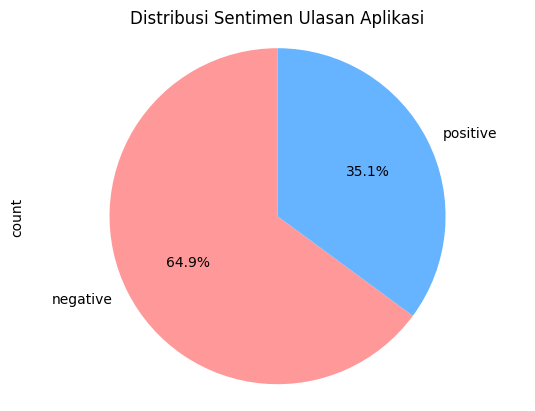

In [75]:
# pie chart
fig, ax = plt.subplots()
clean_df['polarity'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], ax=ax)
ax.axis('equal')
plt.title('Distribusi Sentimen Ulasan Aplikasi')
plt.show()

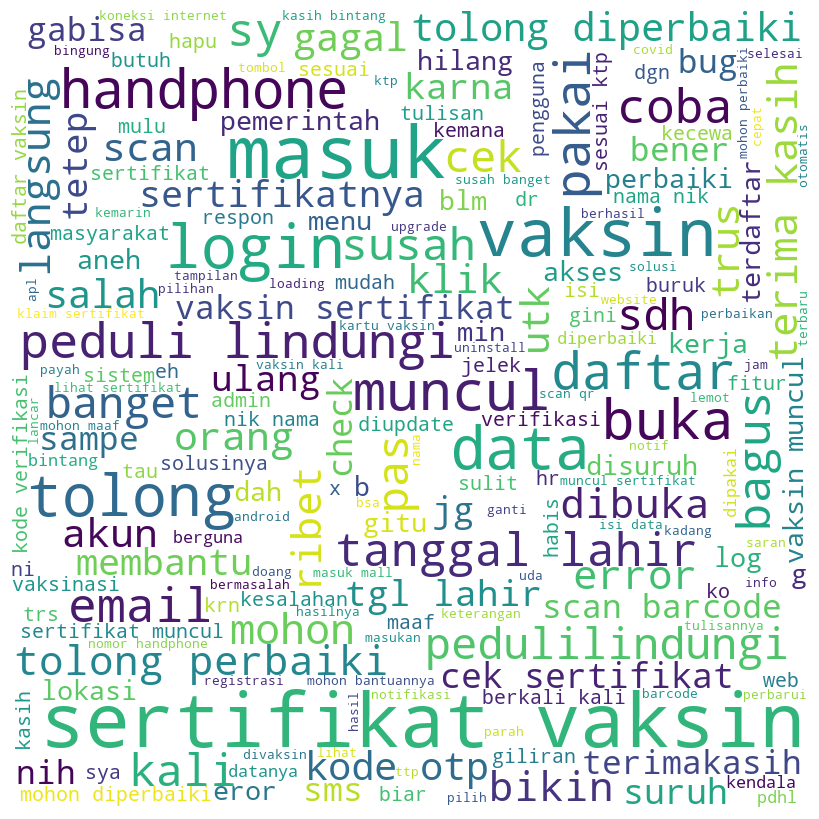

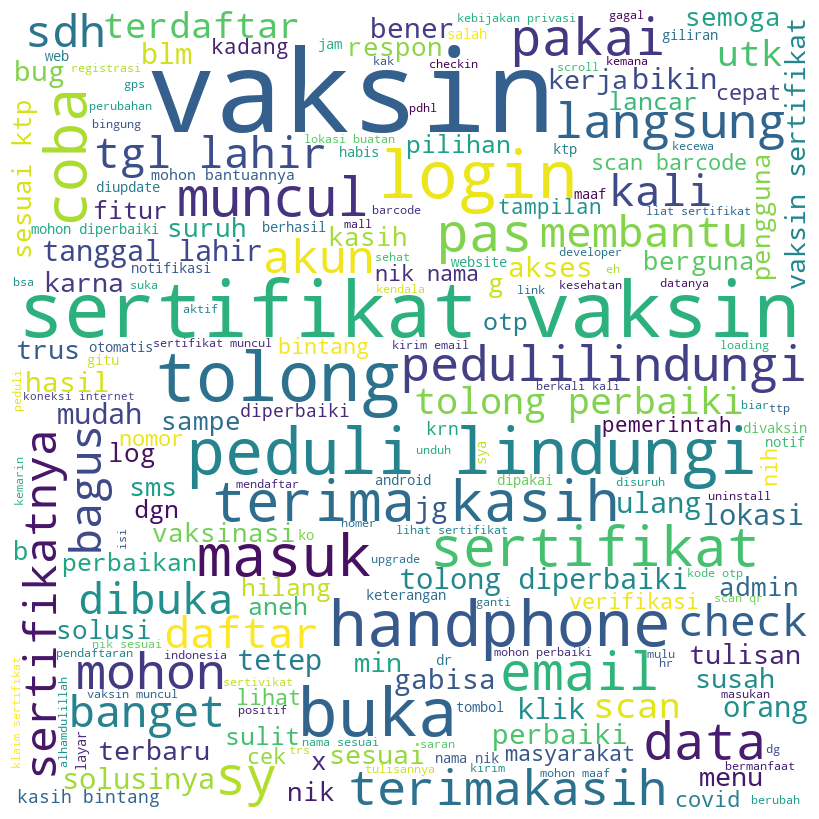

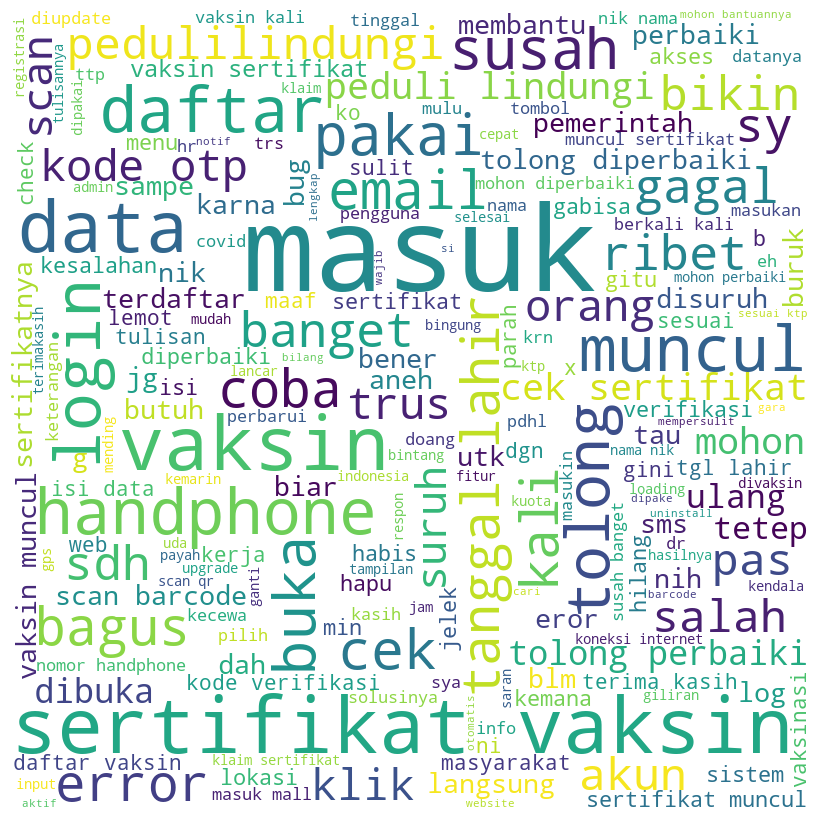

In [76]:
# Menggabungkan semua ulasan menjadi satu teks
text = ' '.join(clean_df['text_akhir'])

# Membuat objek WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(stopwords.words('indonesian')), 
                min_font_size = 10).generate(text)

# WordCloud General
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# WordCloud Positive
text_positive = ' '.join(clean_df[clean_df['polarity'] == 'positive']['text_akhir'])
wordcloud_positive = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(stopwords.words('indonesian')), 
                min_font_size = 10).generate(text_positive)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# WordCloud Negative
text_negative = ' '.join(clean_df[clean_df['polarity'] == 'negative']['text_akhir'])
wordcloud_negative = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(stopwords.words('indonesian')), 
                min_font_size = 10).generate(text_negative)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_negative)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [77]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']
 
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Skema A: SVM + TF-IDF (80/20)

In [78]:
#  Preprocessing data teks menggunakan TF-IDF

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Menerapkan SMOTE pada data latih
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

print("Data latih sebelum SMOTE:", X_train_tfidf.shape, y_train.shape)
print("Data latih setelah SMOTE:", X_train_smote.shape, y_train_smote.shape)

f:\Software\Anaconda\envs\tf\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Data latih sebelum SMOTE: (9336, 17289) (9336,)
Data latih setelah SMOTE: (12124, 17289) (12124,)


In [79]:
# Latih model SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_smote, y_train_smote)

# Prediksi sentimen pada data uji
y_pred = svm.predict(X_test_tfidf)

# Evaluasi model data
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi: 0.8796573875802998
Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.90      0.91      1512
    positive       0.82      0.85      0.83       823

    accuracy                           0.88      2335
   macro avg       0.87      0.87      0.87      2335
weighted avg       0.88      0.88      0.88      2335



### Skema B: Logistic Regression + TF-IDF & Word2Vec (80/20)

In [80]:
# Training Word2Vec
sentences = [text.split() for text in clean_df['text_akhir']]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

def get_average_w2v(tokens, model):
    vectors = [model.wv[t] for t in tokens if t in model.wv.key_to_index]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Ekstrak fitur Word2Vec (rata-rata per kalimat)
X_w2v = np.array([get_average_w2v(text.split(), w2v_model) for text in clean_df['text_akhir']])

# Ekstrak fitur TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(clean_df['text_akhir']).toarray()

# 3. Gabungkan fitur (concatenate)
X_combined = np.concatenate([X_w2v, X_tfidf], axis=1)
print("Dimensi fitur gabungan:", X_combined.shape)

# Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

Dimensi fitur gabungan: (11671, 5100)


f:\Software\Anaconda\envs\tf\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [83]:
# Build Random Forest Classifier
lr_clf = LogisticRegression()
lr_clf.fit(X_train_res, y_train_res)

# Evaluasi pada test set
y_pred_lr = lr_clf.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy (Logistic Regression):", acc_lr)
print(classification_report(y_test, y_pred_lr, target_names=['negative', 'positive']))


Accuracy (Logistic Regression): 0.8668094218415417
              precision    recall  f1-score   support

    negative       0.93      0.86      0.89      1515
    positive       0.78      0.87      0.82       820

    accuracy                           0.87      2335
   macro avg       0.85      0.87      0.86      2335
weighted avg       0.87      0.87      0.87      2335



### Skema C: LSTM (Deep Learning) (70/30)

In [84]:
# Tokenisasi dan padding teks
tokenizer = Tokenizer()  # Bisa disesuaikan dengan num_words jika ingin membatasi jumlah kata
tokenizer.fit_on_texts(clean_df['text_akhir'])
sequences = tokenizer.texts_to_sequences(clean_df['text_akhir'])
X = pad_sequences(sequences)  # Secara| default, padding dilakukan di awal; bisa diatur dengan parameter 'padding' jika perlu

# Encoding label: misalnya kita anggap label positif = 1, negatif = 0, lalu diubah ke one-hot encoding
y = to_categorical((clean_df['polarity'] == 'positive').astype(int))

# Membagi data menjadi training dan test set (70:30) dengan stratifikasi berdasarkan label
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Membangun model LSTM
vocab_size = len(tokenizer.word_index) + 1  # +1 untuk index yang tidak terpakai
embedding_dim = 100
max_length = X.shape[1]

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(100))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Callback early stopping untuk menghentikan training jika validasi loss tidak membaik
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[early_stop]
)

# Evaluasi model pada test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 91, 100)           2001200   
                                                                 
 lstm_6 (LSTM)               (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 2)                 202       
                                                                 
Total params: 2,081,802
Trainable params: 2,081,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
205/205 [==============================] - 6s 17ms/step - loss: 0.4707 - accuracy: 0.7671 - val_loss: 0.3812 - val_accuracy: 0.8427
Epoch 2/10
205/205 [==============================] - 3s 16ms/step - loss: 0.1655 - accuracy: 0.9357 - val_loss: 0.3335 - val_accuracy: 0.8586
Epoch 3/10
205/205 [==

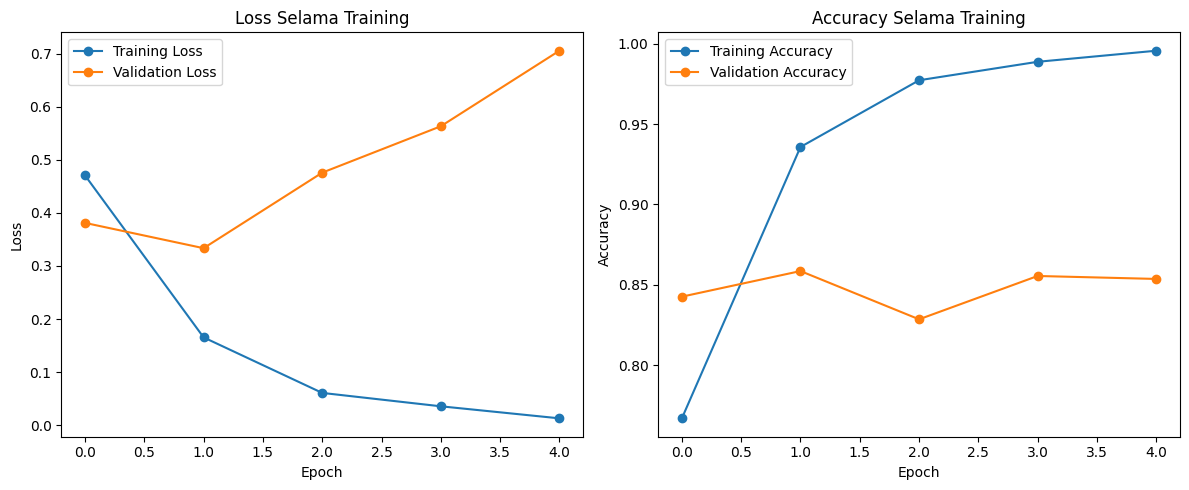

In [85]:
# Visualisasi loss dan akurasi selama training
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], marker='o', label='Training Loss')
plt.plot(history.history['val_loss'], marker='o', label='Validation Loss')
plt.title('Loss Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], marker='o', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.title('Accuracy Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()